## Generate Data

In [1]:
from sklearn.datasets import make_regression

# generate some data
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

## Model Fitting and Quantification

In [2]:
from sklearn.linear_model import LinearRegression

# fit the model
model = LinearRegression()
model.fit(X, y)

/anaconda3/envs/forja_model_testing/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
# show coef
print(f"intercept: {model.intercept_} coef: {model.coef_.item()}")

intercept: 101.89622505659258 coef: 12.440024238506865


In [4]:
# get fitted values
y_hat = model.predict(X)

In [5]:
import matplotlib.pyplot as plt

# plot
plt.scatter(X, y)
plt.plot(X, y_hat, color = "orange")
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
from sklearn.metrics import r2_score

# find r squared
r2_score(y, y_hat)

0.903603363418708

In [7]:
from sklearn.metrics import mean_squared_error

# find mse
mean_squared_error(y, y_hat)

11.933040779746149

In [8]:
# note: r squared is scale invariant, mse is not scale invariant
model2 = LinearRegression()
model2.fit(X * 100, y * 100)
print(r2_score(y * 100, model2.predict(X * 100)))
print(mean_squared_error(y * 100, model2.predict(X * 100)))

0.9036033634187076
119330.40779746181


## Validation: Train Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)

In [11]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

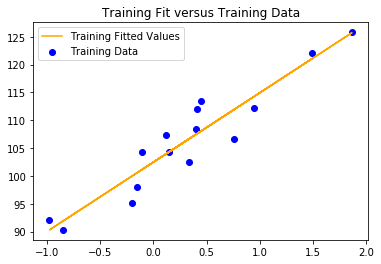

In [12]:
plt.title("Training Fit versus Training Data")
plt.scatter(X_train, y_train, color = "blue", label = "Training Data")
plt.plot(X_train, model3.predict(X_train), color = "orange", label = "Training Fitted Values")
plt.legend()
plt.show()

In [13]:
# score the model using the training data
print(f"Score: {model3.score(X_train, y_train)}")
print(f"R-Squared: {r2_score(y_train, model3.predict(X_train))}")
print(f"R-Squared: {mean_squared_error(y_train, model3.predict(X_train))}")

Score: 0.8899208411411561
R-Squared: 0.8899208411411561
R-Squared: 10.489132777075051


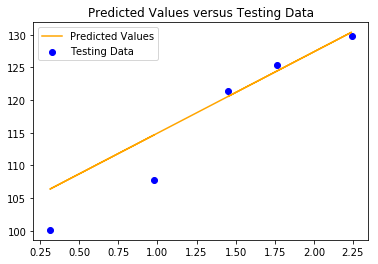

In [14]:
plt.title("Predicted Values versus Testing Data")
plt.scatter(X_test, y_test, color = "blue", label = "Testing Data")
plt.plot(X_test, model3.predict(X_test), color = "orange", label = "Predicted Values")
plt.legend()
plt.show()

In [15]:
# score the model using the testing data
print(f"Score: {model3.score(X_test, y_test)}")
print(f"R-Squared: {r2_score(y_test, model3.predict(X_test))}")
print(f"R-Squared: {mean_squared_error(y_test, model3.predict(X_test))}")

Score: 0.858719664838021
R-Squared: 0.8587196648380209
R-Squared: 17.663942534659423


## Cross Validation

### Cross validator with default splits

In [16]:
from sklearn.model_selection import cross_validate

# apply the cross validator
scores = cross_validate(model3, X, y, scoring=('r2','neg_mean_squared_error'), return_train_score=True, cv=3)

print(scores.keys())
for key in scores.keys():
    print(key, scores[key])

dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error'])
fit_time [0.00049901 0.00051832 0.00036716]
score_time [0.00098777 0.00034571 0.00029325]
test_r2 [0.6519119  0.92355375 0.80647156]
train_r2 [0.8978236  0.88356306 0.90978779]
test_neg_mean_squared_error [-15.51083441  -8.46501305 -16.91284975]
train_neg_mean_squared_error [-10.42791462 -14.11344468 -10.37411015]


### Replicating cross validator with default splits using KFold

In [17]:
from sklearn.model_selection import KFold

# create the splitter object
kf = KFold(n_splits=3)

# see how it will split X by index
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)


# note KFold() creates the splits so that the groups will be non-overlapping 

TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [0 1 2 3 4 5 6]
TRAIN: [ 0  1  2  3  4  5  6 14 15 16 17 18 19] TEST: [ 7  8  9 10 11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15 16 17 18 19]


In [18]:
# apply the Kfold splitter with 3 splits
scores = cross_validate(model3, X, y, scoring=('r2','neg_mean_squared_error'), return_train_score=True, cv=kf)

print(scores.keys())
for key in scores.keys():
    print(key, scores[key])

dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error'])
fit_time [0.0004859  0.00040007 0.00035286]
score_time [0.00100613 0.01093483 0.00087619]
test_r2 [0.6519119  0.92355375 0.80647156]
train_r2 [0.8978236  0.88356306 0.90978779]
test_neg_mean_squared_error [-15.51083441  -8.46501305 -16.91284975]
train_neg_mean_squared_error [-10.42791462 -14.11344468 -10.37411015]


### Using time series splitter in cross validation

In [19]:
from sklearn.model_selection import TimeSeriesSplit

# create the splitter object
tss = TimeSeriesSplit(n_splits=3)

# see how it will split X by index
for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

# By setting the int(len(X)/2)

TRAIN: [0 1 2 3 4] TEST: [5 6 7 8 9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13 14]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [15 16 17 18 19]


In [20]:
# apply the Kfold splitter with 3 splits
scores = cross_validate(model3, X, y, scoring=('r2','neg_mean_squared_error'), return_train_score=True, cv=tss)

print(scores.keys())
for key in scores.keys():
    print(key, scores[key])

dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error'])
fit_time [0.00079107 0.00029802 0.00037384]
score_time [0.00062704 0.00062799 0.00027108]
test_r2 [0.76884092 0.81359963 0.74144068]
train_r2 [0.90639372 0.86261367 0.90909925]
test_neg_mean_squared_error [-19.37368638 -12.50475159 -19.66085106]
train_neg_mean_squared_error [ -5.44203953 -10.80747442  -9.77775482]
